In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('cleaned1.2.csv')
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,42.334044,0.1,11.0,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,4953.0,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,3243.0,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,5382.0,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,3428.0,5500.0,2014


In [4]:
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [5]:
# Initialization
start=0
value = 0

station = data.iloc[:,0]
location = data.iloc[:,1]
state = data.iloc[:,2]
do = data.iloc[:,4].astype(np.float64)

ph = data.iloc[:,5]  
co = data.iloc[:,6].astype(np.float64)   
  
year = data.iloc[:,11]
tc = data.iloc[:,10].astype(np.float64)

bod = data.iloc [:,7].astype(np.float64)
na = data.iloc [:,8].astype(np.float64)

In [6]:
data.head()

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (µmhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,42.334044,0.1,11.0,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.000000,0.2,4953.0,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.700000,0.1,3243.0,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.800000,0.5,5382.0,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.900000,0.4,3428.0,5500.0,2014


In [7]:
data = pd.concat([station, location, state, do, ph, co, bod, na, tc, year], axis=1)
data.columns = ['station', 'location', 'state', 'do', 'ph', 'co', 'bod', 'na', 'tc', 'year']
data

,station,location,state,do,ph,co,bod,na,tc,year
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,6.7,7.5,203.0,42.334044,0.100000,27.0,2014
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014
...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI,",TAMILNADU,7.9,7.2,738.0,2.700000,0.518000,202.0,2003
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK,",TAMILNADU,7.5,6.3,585.0,2.600000,0.155000,315.0,2003
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,7.6,6.2,98.0,1.200000,2.980221,570.0,2003
1989,1404,"GUMTI AT D/S SOUTH TRIPURA,",TRIPURA,7.7,6.5,91.0,1.300000,2.980221,562.0,2003


In [8]:
data.to_csv('final_dataset.csv', index = False)

In [9]:
# Calulation of Ph
data['npH'] = data.ph.apply(lambda x: (100 if (8.5 >= x >= 7)  
                                 else(80 if (8.6 >= x >= 8.5) or (6.9 >= x >= 6.8) 
                                      else(60 if (8.8 >= x >= 8.6) or (6.8 >= x >= 6.7) 
                                          else(40 if (9 >= x >= 8.8) or (6.7 >= x >= 6.5)
                                              else 0)))))

# Calulation of dissolved oxygen
data['ndo'] = data.do.apply(lambda x:(100 if (x >= 6)  
                                 else(80 if  (6 >= x >= 5.1) 
                                      else(60 if (5 >= x >= 4.1)
                                          else(40 if (4 >= x >= 3) 
                                              else 0)))))

# Calulation of total coliform
data['nco'] = data.tc.apply(lambda x:(100 if (5 >= x >= 0)  
                                 else(80 if (50 >= x >= 5) 
                                      else(60 if (500 >= x >= 50)
                                          else(40 if (10000 >= x >= 500) 
                                              else 0)))))

# Calulation of B.D.O
data['nbdo'] = data.bod.apply(lambda x:(100 if (3 >= x >= 0)  
                                 else(80 if  (6 >= x >= 3) 
                                      else(60 if (80 >= x >= 6)
                                          else(40 if (125 >= x >= 80) 
                                              else 0)))))

# Calulation of electrical conductivity
data['nec'] = data.co.apply(lambda x:(100 if (75 >= x >= 0)  
                                 else(80 if (150 >= x >= 75) 
                                      else(60 if (225 >= x >= 150)
                                          else(40 if (300 >= x >= 225) 
                                              else 0)))))

# Calulation of nitrate
data['nna'] = data.na.apply(lambda x:(100 if (20 >= x >= 0)  
                                 else(80 if (50 >= x >= 20) 
                                      else(60 if (100 >= x >= 50)
                                          else(40 if (200 >= x >= 100) 
                                              else 0)))))

data.head()
data.dtypes

station      object
location     object
state        object
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
nco           int64
nbdo          int64
nec           int64
nna           int64
dtype: object

In [10]:
# Formula for caluclating Water Quality index

data['wph'] = data.npH * 0.165
data['wdo'] = data.ndo * 0.281
data['wbdo'] = data.nbdo * 0.234
data['wec'] = data.nec* 0.009
data['wna'] = data.nna * 0.028
data['wco'] = data.nco * 0.281
data['wqi'] = data.wph + data.wdo + data.wbdo + data.wec + data.wna + data.wco 
data

,station,location,state,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,6.7,7.5,203.0,42.334044,0.100000,27.0,2014,100,100,80,60,60,100,16.5,28.10,14.04,0.54,2.8,22.48,84.46
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.000000,0.200000,8391.0,2014,100,80,40,100,60,100,16.5,22.48,23.40,0.54,2.8,11.24,76.96
2,1475,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.700000,0.100000,5330.0,2014,80,100,40,100,60,100,13.2,28.10,23.40,0.54,2.8,11.24,79.28
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.800000,0.500000,8443.0,2014,80,80,40,80,100,100,13.2,22.48,18.72,0.90,2.8,11.24,69.34
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.900000,0.400000,5500.0,2014,100,80,40,100,80,100,16.5,22.48,23.40,0.72,2.8,11.24,77.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI,",TAMILNADU,7.9,7.2,738.0,2.700000,0.518000,202.0,2003,100,100,60,100,0,100,16.5,28.10,23.40,0.00,2.8,16.86,87.66
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK,",TAMILNADU,7.5,6.3,585.0,2.600000,0.155000,315.0,2003,0,100,60,100,0,100,0.0,28.10,23.40,0.00,2.8,16.86,71.16
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,7.6,6.2,98.0,1.200000,2.980221,570.0,2003,0,100,40,100,80,100,0.0,28.10,23.40,0.72,2.8,11.24,66.26
1989,1404,"GUMTI AT D/S SOUTH TRIPURA,",TRIPURA,7.7,6.5,91.0,1.300000,2.980221,562.0,2003,40,100,40,100,80,100,6.6,28.10,23.40,0.72,2.8,11.24,72.86


In [11]:
data.isna().sum()

station     0
location    0
state       0
do          0
ph          0
co          0
bod         0
na          0
tc          0
year        0
npH         0
ndo         0
nco         0
nbdo        0
nec         0
nna         0
wph         0
wdo         0
wbdo        0
wec         0
wna         0
wco         0
wqi         0
dtype: int64

In [12]:
#calculation overall wqi for each year
ag = data.groupby('year')['wqi'].mean()

In [13]:
ag = dict(ag)
ag

{2003: 75.08795454545456,
 2004: 65.52,
 2005: 73.75663865546211,
 2006: 72.37447619047617,
 2007: 73.85833333333329,
 2008: 73.36490566037735,
 2009: 74.45668508287297,
 2010: 75.395,
 2011: 76.66658008658015,
 2012: 79.49671232876719,
 2013: 76.31701149425297,
 2014: 77.67755102040826}

In [14]:
ag.values()

dict_values([75.08795454545456, 65.52, 73.75663865546211, 72.37447619047617, 73.85833333333329, 73.36490566037735, 74.45668508287297, 75.395, 76.66658008658015, 79.49671232876719, 76.31701149425297, 77.67755102040826])

In [15]:
list(ag.keys())

[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]

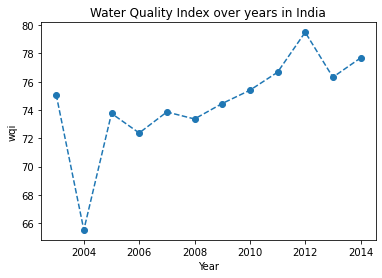

In [16]:
# Scatter plot of data points
y = list(ag.values())
x = list(ag.keys())
plt.xlabel('Year')
plt.ylabel('wqi')
plt.plot(x,y,linestyle = 'dashed', marker = 'o')
plt.title('Water Quality Index over years in India')
plt.show()

In [17]:
import sklearn
from sklearn.linear_model import LinearRegression
x = np.array(x)
y = np.array(y)
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
X_test = np.array([2015, 2016])
print('The expected WQI ', lr.predict(X_test[0].reshape(-1, 1)), '% in 2015')
print('The expected WQI ', lr.predict(X_test[1].reshape(-1, 1)), '% in 2016')
y_test = [lr.predict(X_test[0].reshape(-1, 1))[0], lr.predict(X_test[1].reshape(-1, 1))[0]]

X_test = np.append(x[len(x)-1], X_test)
y_test = np.append(y[len(y)-1], y_test)

The expected WQI  [78.88405129] % in 2015
The expected WQI  [79.55888164] % in 2016


In [19]:
print(X_test)
print(y_test)

[2014 2015 2016]
[77.67755102 78.88405129 79.55888164]


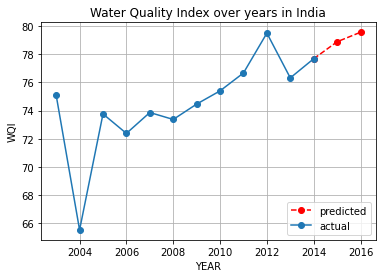

In [20]:
plt.plot(X_test, y_test, color='red', linestyle='dashed', marker='o', label='predicted')
plt.plot(x, y, marker = 'o', label = 'actual')
plt.xlabel('YEAR')
plt.ylabel('WQI')
plt.grid()
plt.title('Water Quality Index over years in India')
plt.legend(loc = 4)
plt.show()

In [21]:
for s in range(len(data.state)):
    data.state.iloc[s] = data.state.iloc[s].lower()
    
    

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [22]:
selected_state = list(set(data.state))
selected_state = sorted(selected_state,key=len)

In [23]:
selected_state = selected_state[:25]

In [24]:
selected_state

['nan',
 'goa',
 'daman',
 'orissa',
 'odisha',
 'punjab',
 'kerala',
 'mizoram',
 'gujarat',
 'haryana',
 'tripura',
 'manipur',
 'karnataka',
 'meghalaya',
 'tamilnadu',
 'rajasthan',
 'chandigarh',
 'mahe river',
 'tamil nadu',
 'maharashtra',
 'daman & diu',
 'pondicherry',
 'madhya pradesh',
 'andhra pradesh',
 'himachal pradesh']

In [25]:
deleted_list = ['mithi river','mahe river','ayur, kerala','coringa river']
for i in deleted_list:
  del i

In [26]:
state_wise = data.groupby('state')['wqi'].mean()

In [27]:
state_wise_dict = {}
for i in range(len(selected_state)):
    state_wise_dict[selected_state[i]] = state_wise[selected_state[i]]

In [28]:
state_wise_dict

{'andhra pradesh': 83.24428571428571,
 'chandigarh': 44.57999999999999,
 'daman': 62.63199999999999,
 'daman & diu': 63.86666666666667,
 'goa': 76.83148387096774,
 'gujarat': 69.88349206349204,
 'haryana': 54.48076923076922,
 'himachal pradesh': 87.82374999999999,
 'karnataka': 84.66545454545455,
 'kerala': 76.81936651583706,
 'madhya pradesh': 93.28,
 'maharashtra': 82.33967213114765,
 'mahe river': 63.50000000000001,
 'manipur': 84.2188888888889,
 'meghalaya': 80.98107382550343,
 'mizoram': 86.53750000000002,
 'nan': 73.49221411192205,
 'odisha': 74.54999999999998,
 'orissa': 79.10692307692307,
 'pondicherry': 61.50999999999999,
 'punjab': 55.880909090909014,
 'rajasthan': 84.05214285714285,
 'tamil nadu': 76.78,
 'tamilnadu': 80.40173913043479,
 'tripura': 79.42222222222225}

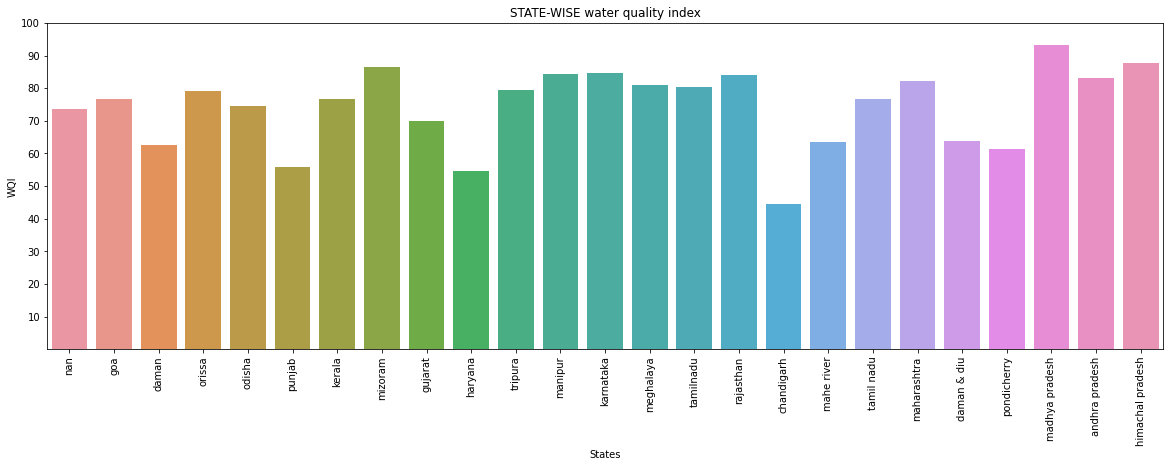

In [29]:
plt.figure(figsize = (20, 6))
ax = sns.barplot(x = list(state_wise_dict.keys()), y = list(state_wise_dict.values()))
ax.set_xticklabels(list(state_wise_dict.keys()), rotation = 90, fontsize = 10)
plt.yticks(ticks = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100])
plt.title("STATE-WISE water quality index")
plt.ylabel("WQI")
plt.xlabel("States")
plt.show()

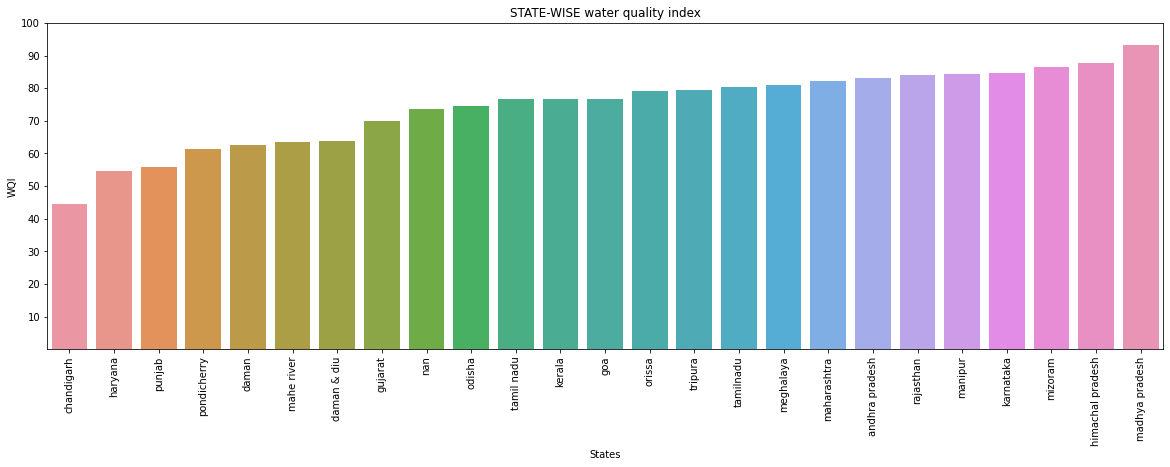

In [30]:
plt.figure(figsize = (20, 6))
sorted_state_dict = dict(sorted(state_wise_dict.items(), key = lambda item: item[1]))
ax = sns.barplot(x = list(sorted_state_dict.keys()), y = list(sorted_state_dict.values()))
ax.set_xticklabels(list(sorted_state_dict.keys()), rotation = 90, fontsize = 10)
plt.yticks(ticks = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100])
plt.ylabel("WQI")
plt.xlabel("States")
plt.title("STATE-WISE water quality index")
plt.show()

{2003: 85.08, 2004: 76.38, 2005: 75.72666666666666, 2006: 83.64, 2007: 79.51777777777777, 2008: 89.12, 2009: 82.06222222222222, 2011: 74.00941176470587, 2012: 73.86285714285715, 2013: 73.95285714285716, 2014: 73.72357142857143}


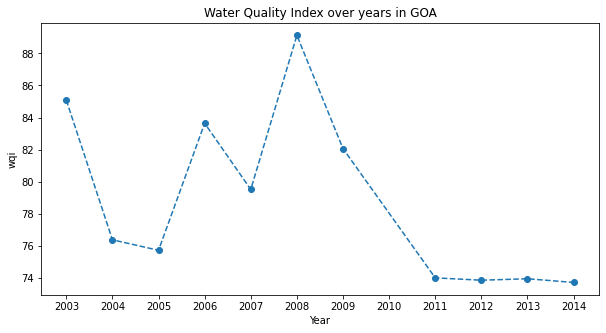

In [31]:
plt.figure(figsize = (10, 5))
goa_data = data.groupby('state')
goa_data = goa_data.get_group('goa')
goa_data = goa_data.groupby('year')['wqi'].mean()
goa_data = dict(goa_data)
y=list(goa_data.values())
x=list(goa_data.keys())
print(goa_data)
plt.xlabel('Year')
plt.ylabel('wqi')
plt.plot(x ,y, linestyle = 'dashed', marker='o')
plt.xticks([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])
plt.title('Water Quality Index over years in GOA')
plt.show()

{2012: 93.28, 2013: 93.28}


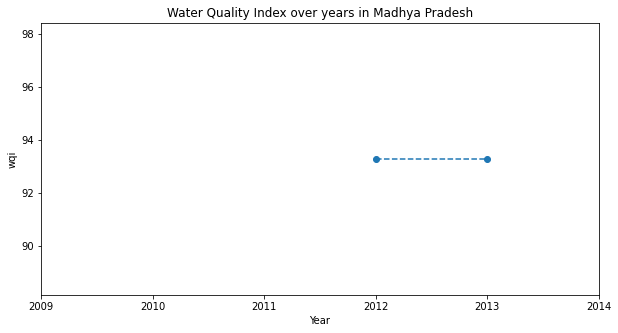

In [32]:
plt.figure(figsize = (10, 5))
new_data = data.groupby('state')
new_data = new_data.get_group('madhya pradesh')
new_data = new_data.groupby('year')['wqi'].mean()
new_data = dict(new_data)
y = list(new_data.values())
x = list(new_data.keys())
print(new_data)
plt.xlabel('Year')
plt.ylabel('wqi')
plt.plot(x, y, linestyle = 'dashed', marker='o')
plt.xticks([2009, 2010, 2011, 2012, 2013, 2014])
plt.title('Water Quality Index over years in Madhya Pradesh')
plt.show()

{2003: 66.155, 2005: 65.185, 2006: 74.55000000000001, 2007: 69.165, 2008: 66.12, 2009: 64.55999999999999, 2010: 70.26857142857143, 2011: 76.21636363636364, 2012: 58.815999999999995, 2013: 73.30428571428571}


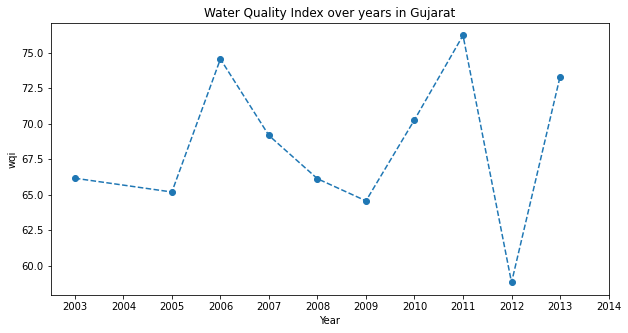

In [33]:
plt.figure(figsize = (10, 5))
new_data = data.groupby('state')
new_data = new_data.get_group('gujarat')
new_data = new_data.groupby('year')['wqi'].mean()
new_data = dict(new_data)
y = list(new_data.values())
x = list(new_data.keys())
print(new_data)
plt.xlabel('Year')
plt.ylabel('wqi')
plt.plot(x, y, linestyle = 'dashed', marker = 'o')
plt.xticks([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])
plt.title('Water Quality Index over years in Gujarat')
plt.show()

{2003: 72.14000000000001, 2005: 88.02, 2006: 77.72, 2007: 82.58000000000001, 2008: 77.72, 2009: 78.66, 2011: 86.975, 2012: 86.92999999999999, 2013: 86.975, 2014: 85.57}


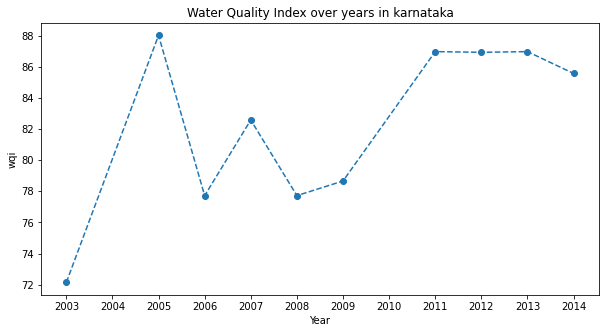

In [34]:
plt.figure(figsize = (10, 5))
new_data = data.groupby('state')
new_data = new_data.get_group('karnataka')
new_data = new_data.groupby('year')['wqi'].mean()
new_data = dict(new_data)
y = list(new_data.values())
x = list(new_data.keys())
print(new_data)
plt.xlabel('Year')
plt.ylabel('wqi')
plt.plot(x, y, linestyle = 'dashed', marker='o')
plt.xticks([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014])
plt.title('Water Quality Index over years in karnataka')
plt.show()

{2011: 88.13000000000001, 2012: 89.53500000000001, 2013: 86.905, 2014: 86.72500000000001}


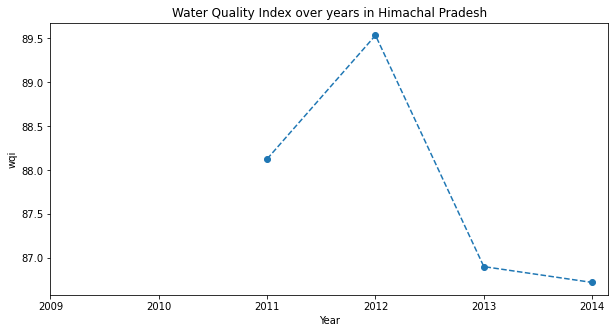

In [35]:
plt.figure(figsize = (10, 5))
new_data = data.groupby('state')
new_data = new_data.get_group('himachal pradesh')
new_data = new_data.groupby('year')['wqi'].mean()
new_data = dict(new_data)
y=list(new_data.values())
x=list(new_data.keys())
print(new_data)
plt.xlabel('Year')
plt.ylabel('wqi')
plt.plot(x, y, linestyle = 'dashed', marker = 'o')
plt.xticks([2009, 2010, 2011, 2012, 2013, 2014])
plt.title('Water Quality Index over years in Himachal Pradesh')
plt.show()